In [106]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [107]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [108]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [109]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [110]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [111]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [112]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [113]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [114]:
# Display the measurement's columns and data in dictionary format
measurement_first_row = session.query(Measurement).first()
measurement_first_row .__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fe7c8075fd0>,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08}

In [115]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The most recent date is {latest_date}")

The most recent date is ('2017-08-23',)


In [116]:
# Calculate the date one year from the last date in data set.
one_year_from_last_date = dt.date(2017,8,23)-dt.timedelta(days=365)
one_year_from_last_date

datetime.date(2016, 8, 23)

In [117]:
# Perform a query to retrieve the data and precipitation scores
recent_one_year_list = session.query(Measurement.date,Measurement.prcp).\
                filter(func.datetime(Measurement.date) >= one_year_from_last_date).\
                order_by(Measurement.date).all()  
recent_one_year_list

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [118]:
# Save the query results as a Pandas DataFrame and set the index to the date column
recent_year_df = pd.DataFrame(recent_one_year_list, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
recent_year_df.set_index('Date').head()




,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


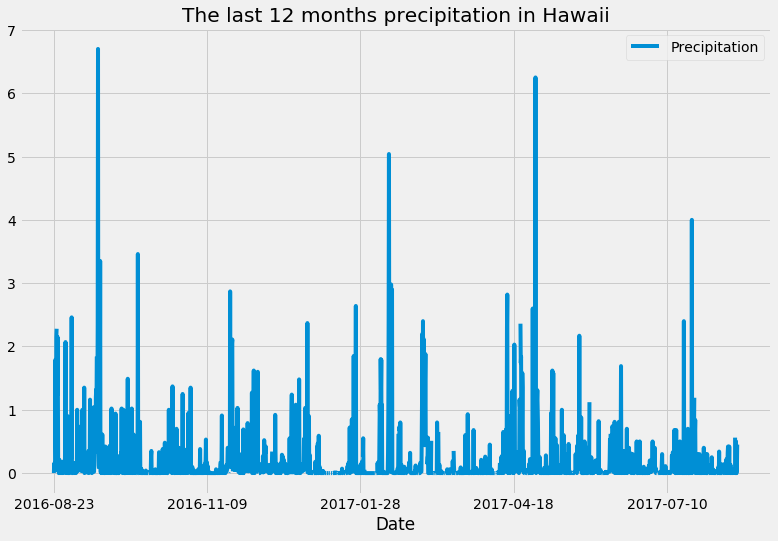

In [119]:
#Use Pandas Plotting with Matplotlib to plot the data
recent_year_df.plot('Date', 'Precipitation', figsize=(12,8))
plt.ylabel = 'inches'
plt.grid(True)
plt.title("The last 12 months precipitation in Hawaii")
plt.savefig('Images/Precipitation.png')
plt.show()

In [120]:
# Use Pandas to calcualte the summary statistics for the precipitation data
recent_year_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [121]:
# Display the station's columns and data in dictionary format
station_first_row = session.query(Station).first()
station_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fe7f848f4d0>,
 'elevation': 3.0,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397',
 'latitude': 21.2716}

In [122]:
# Design a query to calculate the total number stations in the dataset
total_station = session.query(Station.id).count()
print(f"There are {total_station} stations in total")

There are 9 stations in total


In [123]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_list = session.query(Measurement.id, Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()

station_list

[(12188, 'USC00519281', 2772),
 (1, 'USC00519397', 2724),
 (2725, 'USC00513117', 2709),
 (9519, 'USC00519523', 2669),
 (16939, 'USC00516128', 2612),
 (5434, 'USC00514830', 2202),
 (14960, 'USC00511918', 1979),
 (7636, 'USC00517948', 1372),
 (9008, 'USC00518838', 511)]

In [124]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == "USC00519281").all()

active_station_data

[(54.0, 85.0, 71.66378066378067)]

In [125]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_station_tob = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == "USC00519281").\
    filter(Measurement.date > one_year_from_last_date).\
    order_by(Measurement.date).all()
active_station_tob

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [126]:
# Save the query results as a Pandas DataFrame
active_station_df = pd.DataFrame(active_station_tob, columns=['Date', 'tobs'])



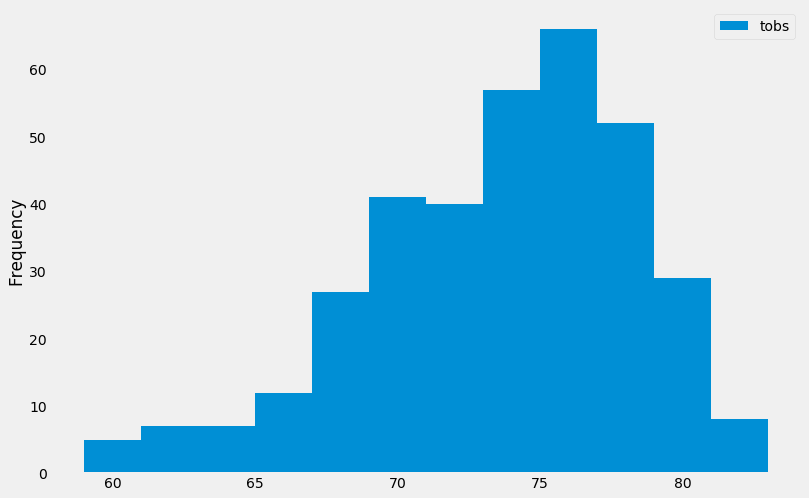

In [127]:

#Use Pandas Plotting with Matplotlib to plot the data
active_station_df.plot.hist(bins=12, figsize=(12,8))
plt.savefig('Images/tobs.png')
plt.grid()

# Close session

In [128]:
# Close Session
session.close()

In [129]:
start_only_results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.date >= dt.date(2016,8,23)).all()

one_year_from_last_date
start_only_results

[(58.0, 74.59058295964125, 87.0)]

In [130]:
one_year_from_last_date

print(one_year_from_last_date)

2016-08-23


In [131]:
dt.date(2016,8,23)

datetime.date(2016, 8, 23)